In [2]:
import glob
import scipy
import uproot as up
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np
import time
import pandas as pd
#import Pool
from multiprocessing import Pool
from scipy.stats import zscore

In [3]:
bi214 = pd.read_csv('bi214_data.csv')
po214 = pd.read_csv('po214_data.csv')
cf252 = pd.read_csv('cf252_data.csv')
na22 = pd.read_csv('na22_data.csv')


In [4]:
bi214 = bi214.drop(bi214[bi214.index > 17090].index)
po214 = po214.drop(po214[po214.index > 17090].index)
cf252 = cf252.drop(cf252[cf252.index > 17090].index)
na22 = na22.drop(na22[na22.index > 17090].index)





In [5]:
display(na22)

,Unnamed: 0,pulseArea_phd,coincidence,areaFractionTime50_ns,areaFractionTime75_ns,areaFractionTime90_ns,pulseStartTime_ns,pulseEndTime_ns,peakAmp,peakTime_ns,af50pa,af75pa,af90pa,pulselength
0,0,37.631207,33,110,160,220,774210,774550,0.380913,80,2.923106,4.251790,5.846212,340
1,1,44.294827,39,100,140,170,60,360,0.391460,80,2.257600,3.160640,3.837920,300
2,2,46.130451,38,100,140,170,60,350,0.450034,70,2.167765,3.034872,3.685201,290
3,3,125.766914,77,100,140,200,613690,614110,1.113172,60,0.795122,1.113170,1.590243,420
4,4,42.256130,41,110,160,210,-521650,-521310,0.445494,80,2.603173,3.786433,4.969693,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17086,17086,28.196896,30,100,150,200,70,390,0.264834,80,3.546490,5.319735,7.092979,320
17087,17087,79.324303,63,100,140,200,60,440,0.673138,80,1.260648,1.764907,2.521295,380
17088,17088,25.329342,23,90,140,210,60,390,0.270818,80,3.553191,5.527187,8.290780,330
17089,17089,15.605631,15,80,110,150,70,330,0.165414,50,5.126355,7.048738,9.611915,260


In [6]:
total = pd.concat([bi214,po214,cf252,na22],ignore_index=True)

def cut_1D(df,min,max,datatype):
    
    cut = df[df['{}'.format(datatype)].between(min, max)]
    totalcut = total[total['{}'.format(datatype)].between(min, max)]
    
    signal = len(cut)
    background = len(totalcut)
    
    confidence = signal/background
    countscovered = signal/len(df.pulseArea_phd)
    
    perf = confidence + countscovered

    
    return confidence, countscovered, perf

def cut_2D(df,xmin,xmax,ymin,ymax):
    cut1 = df[df['pulseArea_phd'].between(xmin, xmax)]
    cutted = cut1[cut1['af75pa'].between(ymin,ymax)]
    
    totalcut = total[total['pulseArea_phd'].between(xmin, xmax)]
    totalcutted = totalcut[totalcut['af75pa'].between(ymin,ymax)]
    
    signal = len(cutted)
    background = len(totalcutted)
    
    confidence = signal/background
    countscovered = signal/len(df.pulseArea_phd)
    
    perf = confidence + countscovered
    
    return confidence, countscovered, perf

def cut_3D(df,xmin,xmax,ymin,ymax,zmin,zmax):
    cut1 = df[df['pulseArea_phd'].between(xmin, xmax)]
    cut2 = cut1[cut1['af75pa'].between(ymin,ymax)] 
    cutted = cut2[cut2['pulselength'].between(zmin,zmax)]
    
    totalcut1 = total[total['pulseArea_phd'].between(xmin, xmax)]
    totalcut2 = totalcut1[totalcut1['af75pa'].between(ymin,ymax)]
    totalcutted = totalcut2[totalcut2['pulselength'].between(zmin,zmax)]
    
    signal = len(cutted)
    background = len(totalcutted)
    
    confidence = signal/background
    countscovered = signal/len(df.pulseArea_phd)
    
    perf = confidence + countscovered
    
    return confidence, countscovered, perf
    
    

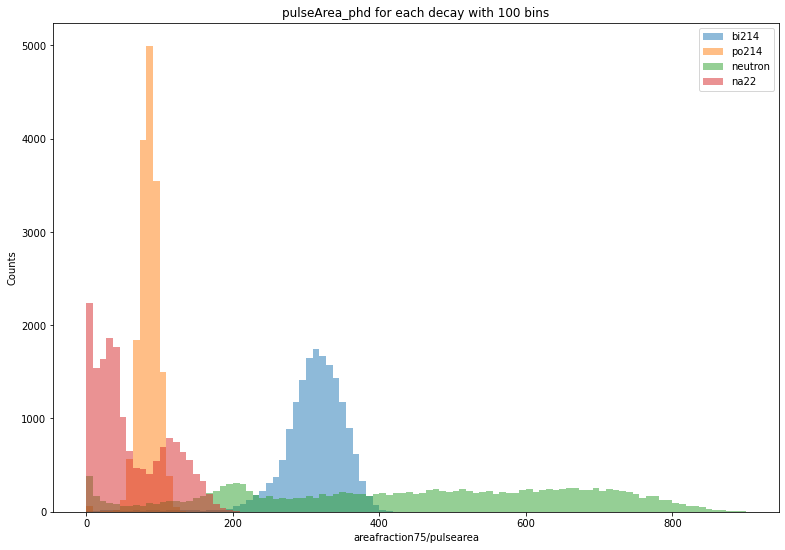

In [7]:
fig, ax = plt.subplots(figsize=(13,9))
 

bins = np.linspace(0,900,100)


plt.hist(bi214.pulseArea_phd, bins, alpha=0.5, label="bi214")
plt.hist(po214.pulseArea_phd, bins, alpha=0.5, label="po214")
plt.hist(cf252.pulseArea_phd, bins, alpha=0.5, label="neutron")
plt.hist(na22.pulseArea_phd, bins, alpha=0.5, label="na22")

plt.legend(loc='upper right')

plt.title('pulseArea_phd for each decay with 100 bins')
plt.xlabel('areafraction75/pulsearea')
plt.ylabel('Counts')

plt.show()

In [8]:
print(cut_1D(bi214,222,398,'pulseArea_phd'))

(0.8321741759903235, 0.9661225206248903, 1.7982966966152139)


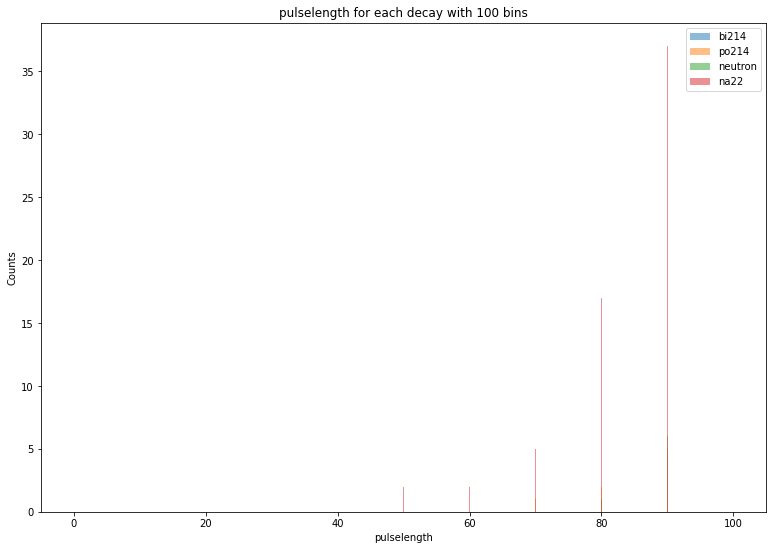

In [10]:
fig, ax = plt.subplots(figsize=(13,9))
 

bins = np.linspace(0,1000,100)


plt.hist(bi214.pulselength, bins, alpha=0.5, label="bi214")
plt.hist(po214.pulselength, bins, alpha=0.5, label="po214")
plt.hist(cf252.pulselength, bins, alpha=0.5, label="neutron")
plt.hist(na22.pulselength, bins, alpha=0.5, label="na22")

plt.legend(loc='upper right')

plt.title('pulselength for each decay with 100 bins')
plt.xlabel('pulselength')
plt.ylabel('Counts')

plt.show()

In [39]:
cut_1D(bi214,404,535,'pulselength')

(0.5223792504180739, 0.9321280205956352, 1.454507271013709)

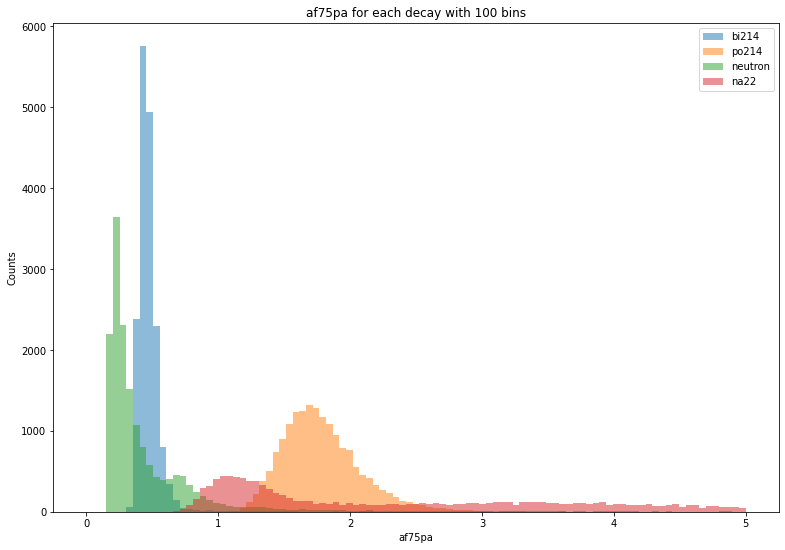

In [53]:
fig, ax = plt.subplots(figsize=(13,9))
 

bins = np.linspace(0,5,100)


plt.hist(bi214.af75pa, bins, alpha=0.5, label="bi214")
plt.hist(po214.af75pa, bins, alpha=0.5, label="po214")
plt.hist(cf252.af75pa, bins, alpha=0.5, label="neutron")
plt.hist(na22.af75pa, bins, alpha=0.5, label="na22")

plt.legend(loc='upper right')

plt.title('af75pa for each decay with 100 bins')
plt.xlabel('af75pa')
plt.ylabel('Counts')

plt.show()

In [59]:
cut_1D(bi214,0.3, 0.67,'af75pa')

(0.7541057980219581, 0.9725586566028904, 1.7266644546248484)

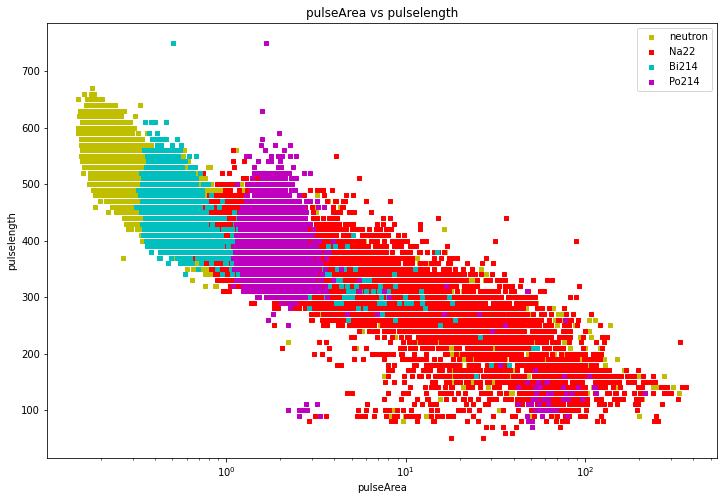

In [78]:
fig, ax = plt.subplots(figsize=(12,8))






plt.scatter(cf252.af75pa, cf252.pulselength, s=10, c='y', marker="s", label='neutron')
plt.scatter(na22.af75pa, na22.pulselength, s=10, c='r', marker="s", label='Na22')
plt.scatter(bi214.af75pa, bi214.pulselength, s=10, c='c', marker="s", label='Bi214')
plt.scatter(po214.af75pa, po214.pulselength, s=10, c='m', marker="s", label='Po214')


#plt.hist2d(bi212.pulseArea_phd, bi212.tp, (50, 50), cmap=plt.cm.jet)
#plt.hist2d(po212.pulseArea_phd,po212.coincidence, (50, 50), cmap=plt.cm.jet)
#plt.hist2d(neutron.pulseArea_phd, neutron.coincidence, (50, 50), cmap=plt.cm.jet)
#plt.hist2d(na22.pulseArea_phd, na22.coincidence, (50, 50), cmap=plt.cm.jet)
#plt.colorbar()



plt.title('pulseArea vs pulselength')
plt.xlabel('pulseArea')
plt.ylabel('pulselength')
plt.legend()
#ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

In [14]:
cut_2D(cf252,390,1000,0,1000)

(0.9885894156993901, 0.5880287870809198, 1.5766182027803097)

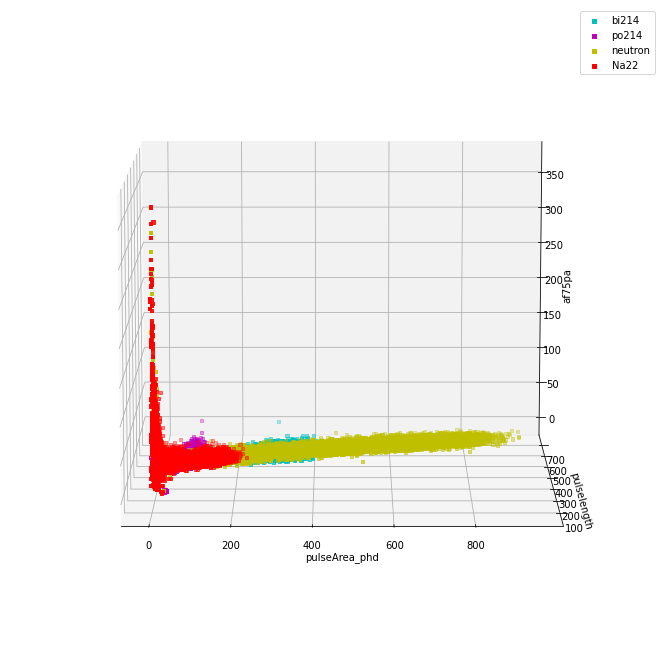

In [77]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter(bi214.pulseArea_phd, bi214.pulselength, bi214.af75pa, s=10, c='c',marker="s", label='bi214')
ax.scatter(po214.pulseArea_phd, po214.pulselength, po214.af75pa, s=10, c='m',marker="s", label='po214')
ax.scatter(cf252.pulseArea_phd, cf252.pulselength, cf252.af75pa, s=10, c='y',marker="s", label='neutron')
ax.scatter(na22.pulseArea_phd, na22.pulselength, na22.af75pa, s=10, c='r',marker="s", label='Na22')

ax.set_xlabel('pulseArea_phd')
ax.set_ylabel('pulselength')
ax.set_zlabel('af75pa')
ax.view_init(10, -90)

plt.legend()
plt.show()

In [63]:
print('pulseArea/af75pa')
print('bi214 2d cut:' + str(cut_2D(bi214,225,394,0.357,0.653)))
print('po214 2d cut:' + str(cut_2D(po214,57.6,119,1.29,2.64)))
print('cf252 2d cut:' + str(cut_2D(cf252,394,1000,0,0.357)))
print('na22  2d cut:' + str(cut_2D(na22,0,57.5,2.65,20)))
print('=================================================================')
print('bi214 3d cut:' + str(cut_3D(bi214,225,394,0.357,0.653,410,534)))
print('po214 3d cut:' + str(cut_3D(po214,57.6,119,1.29,2.64,330,435)))
print('cf252 3d cut:' + str(cut_3D(cf252,394,1000,0,0.357,520,727)))
print('na22  3d cut:' + str(cut_3D(na22,0,57.5,2.65,5,50,427)))



pulseArea/af75pa
bi214 2d cut:(0.8409429407837297, 0.9580480954888538, 1.7989910362725836)
po214 2d cut:(0.8151920115256595, 0.9600959569363993, 1.7752879684620586)
cf252 2d cut:(0.9942746140476434, 0.5690129307822831, 1.5632875448299264)
na22  2d cut:(0.9076804577464789, 0.48265168802293607, 1.3903321457694149)
bi214 3d cut:(0.8428641118759824, 0.9098355859809256, 1.752699697856908)
po214 3d cut:(0.8170016295491581, 0.8800538295009069, 1.697055459050065)
cf252 3d cut:(0.9988502443230813, 0.40664677315546194, 1.4054970174785433)
na22  3d cut:(0.911144578313253, 0.2477912351530045, 1.1589358134662575)
